In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [8]:
def plot_box_plot(df, up, down, x, run, total_run, color, width):
    plot_x = x-(width+0.1)*total_run/2-width + (width+0.1)*(run+1)-0.1
    pred_rmse=[0,0,0,0]
    for j in range(0,4):
        goal = df.loc[(df.dV<up[j]) & (df.dV>=down[j])].index
        pred = (df.pred_24h_dV[goal]-df.dV[goal]).values
        pred = np.sort(pred)
        pred_rmse[j]=round((pred**2).mean()**0.5, 1)
        # min ,low90, 75 50 25 top90, max , mean
        values = [0]*8
        values[0] = pred[len(pred)-1]
        values[1] = pred[int(np.round((len(pred)+1)*0.9)-1)]
        values[2] = pred[int(np.round((len(pred)+1)*0.75)-1)]
        values[3] = pred[int(np.round((len(pred)+1)*0.5)-1)]
        values[4] = pred[int(np.round((len(pred)+1)*0.25)-1)]
        values[5] = pred[int(np.round((len(pred)+1)*0.1)-1)]
        values[6] = pred[0]
        values[7] = pred.mean()
     
        ax.plot([plot_x[j]-width, plot_x[j]+width] ,[values[0], values[0]], color='lightgrey')
        ax.plot([plot_x[j]-width, plot_x[j]+width] ,[values[6], values[6]], color='lightgrey')
        ax.plot([plot_x[j],plot_x[j]] ,[ values[0], values[6]], color='lightgrey')
        ax.plot([plot_x[j]-width, plot_x[j]+width] ,[values[1], values[1]], color='k')
        ax.plot([plot_x[j]-width, plot_x[j]+width] ,[values[5], values[5]], color='k')
        ax.plot([plot_x[j], plot_x[j]] ,[values[1], values[5]], color='k')
    
        ax.add_patch(patches.Rectangle((plot_x[j]-width, values[2]), 2*width, values[4] - values[2],
                    edgecolor = color, facecolor = 'white', fill=True, alpha=1, zorder=3, lw = 2)) 
                                         
        ax.plot([plot_x[j]-width, plot_x[j]+width] ,[values[3], values[3]], color=color, zorder=4)
        ax.plot(plot_x[j] ,values[7], 'o',  color=color,  zorder=4)
    return pred_rmse

In [24]:
path = '../saved_csv'
csvs = [f for f in os.listdir(path) if f.endswith('csv')]
csvs.sort()
csvs

['cca_nopad_noshear_deep_no_atten.csv', 'cnn.csv', 'ctl_deep.csv']

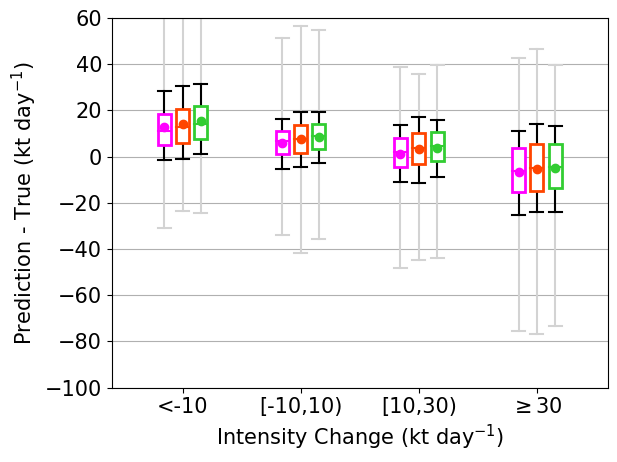

In [25]:
up = [-10, 10, 30, 300]
down = [-300, -10, 10, 30]
x = np.array([0.,1,2,3])

width = 0.055
total_run = len(csvs)
color = ['fuchsia','orangered','limegreen','deepskyblue','pink','tan','yellow']

df_tmp = pd.DataFrame()

fig, ax = plt.subplots()
for i, csv in enumerate(csvs):
    df = pd.read_csv(os.path.join(path, csv))
    df['dV'] = df['24h_Vmax'] - df.now
    df['pred_24h_dV'] = df.pred_24h_Vmax - df.now
    df_tmp = pd.concat([df_tmp, df], axis=0)

    pred_rmse = plot_box_plot(df, up, down, x, i, 2, color[i], width)
  
plt.xticks(x, ['<-10', '[-10,10)', '[10,30)', r'$\geq$30'],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Intensity Change (kt day$^{-1}$)',fontsize=15)
plt.ylabel('Prediction - True (kt day$^{-1}$)',fontsize=15)
plt.xlim([-0.6, 3.6])
plt.ylim([-100, 60])
plt.grid(axis = 'y')

#fig.savefig('./cross_validation_2box.png', dpi=500 bbox_inches="tight")
plt.show()

In [17]:
df.head(7)

,now,24h_Vmax,pred_24h_Vmax,starting_frame,dV,pred_24h_dV
0,13.12,28.24,35.71,201901E_2019062515,15.12,22.59
1,13.12,30.55,40.42,201901E_2019062518,17.43,27.30
2,16.12,33.51,50.61,201901E_2019062521,17.39,34.49
3,18.12,35.24,39.59,201901E_2019062600,17.12,21.47
4,18.30,37.86,51.00,201901E_2019062603,19.56,32.70
5,18.68,39.13,51.59,201901E_2019062606,20.45,32.91
6,22.16,38.69,51.75,201901E_2019062609,16.53,29.59
